In [1]:
# Import dependencies
import tweepy
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import time
from config import api_key, api_secret, a_token, a_token_secret

In [2]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(a_token, a_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
#Get tweets from each news organization's twitter feeds.

# Create an empty list to hold sentiments.
sentiments = []


## I found that using CBSNews vs CBS drastically changed the output. 
## CBS tends to be more positive while CBSNews is more negative. 
## I left both pieces of code to show that either could be used, but opted to use both CBS and CBSNews to 
## illustrate the drastic difference in the two.

# news_outlet = ("@BBCNews", "@CBSNews", "@CNN", "@FoxNews", "@NYTimes")
news_outlet = ("@BBCNews", "@CBS", "@CNN", "@FoxNews", "@NYTimes", "@CBSNews")



# Loop though target users.
for user in news_outlet:
    
    # Counter 
    counter = 1

    # Loop through 5 pages of tweets for each news organization.
    # Get all tweets from the homefeed of each news organization.
    # Each page of tweets = 20, so by calling for a count of 100 
    # we accomplish the same thing with one less nested loop.

    public_tweets = api.user_timeline(user, count=100)

    #Loop through all tweets.
    for tweet in public_tweets:
    
        # Run the Vader analysis on each tweet.
        print("Tweet %s: %s" % (counter, tweet["text"]))

        # Establish the compound score, positive, negativem and neutral scores. 
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        
        # define tweets ago and tweet_text
        tweets_ago = counter
        tweet_text = tweet["text"]

        # Append sentiments for each tweet to the empty sentiments list.
        sentiments.append({"News Outlet" : user,
                           "Date": tweet["created_at"],
                           "Compound" : compound,
                           "Positive" : pos,
                           "Negative" : neg,
                           "Neutral" : neu,
                           "Tweet Count" : counter,
                           "Tweet Text" : tweet_text})
        
        # Add to counter.
        counter = counter + 1

Tweet 1: WWE star Glenn Jacobs, aka Kane, elected mayor in Tennessee https://t.co/bbOqk3Z1E7
Tweet 2: Europe heatwave: Side effects felt by zoo animals, sprout farmers and more https://t.co/XJ9Bk5eS3z
Tweet 3: Should tech companies be paying more tax? https://t.co/XCA1feJdhl
Tweet 4: European Championships 2018: Emily Kay wins GB's first European medal https://t.co/ysUZQQXhui
Tweet 5: Joanna Blair: Great Britain javelin thrower banned for four years https://t.co/OzAhZbphVv
Tweet 6: What really happened when Donald Trump met the Queen?

https://t.co/MzZBR3lNMG https://t.co/03gTzmu44b
Tweet 7: Teen jailed for life for IS terror plot https://t.co/2dGCAIc9Va
Tweet 8: RT @BBCBreaking: Youngest woman to be convicted of plotting terror attack on British soil jailed for life with 13-year minimum term https:/…
Tweet 9: RT @bbcweather: UK weather: How long will the heatwave last? And other questions: https://t.co/gN1G4BJEDK Jo https://t.co/LqZbaTbApS
Tweet 10: Premier League: How can rivals stop

Tweet 1: Celebrate #NationalAvocadoDay with @letsmakeadeal. 🥑 Relive this #LMAD moment when an avocado wins one amazing deal! https://t.co/QS8GLajWU5
Tweet 2: Housewives. PTA moms. School volunteers. Starting TONIGHT, hear the stories of seemingly innocent women who put it… https://t.co/5TA15OiTuh
Tweet 3: This is one allowance that can’t be beat! Kids are winning big this week on @PriceIsRight. 🎉
 https://t.co/lncKu9XvNo
Tweet 4: Renowned artists Cher, Philip Glass, Reba McEntire, Wayne Shorter, and the co-creators of #Hamilton will be recogni… https://t.co/PEjjI9MKE1
Tweet 5: Who's excited for the return of @MurphyBrownCBS? Here's a behind-the-scenes look at the first table read of the sea… https://t.co/1B5S4WJnCW
Tweet 6: Mark your calendars because you won’t want to miss this! Former Secretaries of State @HillaryClinton, @Madeleine, a… https://t.co/JKDPp97OqN
Tweet 7: The cast couldn’t be more excited to welcome @ansonmount into the @startrekcbs family! Who’s ready to see the iconi

Tweet 1: Brookstone, the mall and airport seller best known for massage chairs, quirky gadgets and travel luggage, has filed… https://t.co/pF2YswxKFV
Tweet 2: She confronted her harasser, and he punched her in the face. Now she's fighting back.

This week, France passed a n… https://t.co/0xCopADyRF
Tweet 3: JUST IN: The man suspected of killing a prominent Houston doctor in broad daylight two weeks ago has been found dea… https://t.co/cGLJ1zwXNF
Tweet 4: Your stomach will drop as you watch this massive cargo plane loop upside-down in the sky https://t.co/80aZHRR05O https://t.co/kzydF8brnv
Tweet 5: Police are holding a press conference to give updates on the suspected killer of a prominent Houston doctor.

Watch… https://t.co/yuwsaz26gn
Tweet 6: This is how fast the Carr Fire is spreading in Northern California https://t.co/dXcwM87BB5 https://t.co/rU3jNRwyHM
Tweet 7: A search is underway for a 12-year-old girl who was allegedly abducted from Ronald Reagan Washington National Airpo… http

Tweet 1: Poll: Ohio Special Election. https://t.co/qjwXWsKIvp
Tweet 2: Breaking News: Man suspected of murdering George HW Bush's doctor is found dead in Houston https://t.co/OMqY1r0f8k
Tweet 3: .@NASA names nine 'American hero' astronauts for SpaceX, Boeing missions https://t.co/xlLsi1OWen
Tweet 4: Delta passengers restrain unruly man threatening to 'take the plane down' https://t.co/F0axhKYtHY
Tweet 5: .@Scaramucci: "Because of his policies, because of his strengthening at the border, the minority unemployment situa… https://t.co/YT1tTHCzKS
Tweet 6: Speaking to reporters, TV icon @KelseyGrammer reflected on the biggest lessons he’s learned in his life.… https://t.co/SWHXAzuWag
Tweet 7: Surfers leave the water next to Scripps Pier Thursday, Aug. 2, 2018, in San Diego. The @Scripps_Ocean says it has r… https://t.co/tIqA8F8iv5
Tweet 8: Report: Crews scour pig farm for missing student #MollieTibbetts; @MattFinnFNC reports. https://t.co/lp7MeyoBd5
Tweet 9: Protests along Israel-Gaza borde

Tweet 1: Desperate to keep a job that was her way out of poverty, she tried using hypertension pills, a knitting needle and… https://t.co/hmWh30zJgk
Tweet 2: "You started understanding the life of the people, how they lived, what they thought, who they loved" https://t.co/8xcwoOAEvW
Tweet 3: Training high schoolers, hiring recently released inmates and installing start-up-like amenities are a few of the w… https://t.co/u7byxYELRy
Tweet 4: A huge grid of vehicle tracks tattoos the land just outside Arctic National Wildlife Refuge in Alaska, a remnant of… https://t.co/HnyeirQiJA
Tweet 5: RT @jmartNYT: NEW: Democrats have a chance to take back the Kansas governorship, especially if Kobach wins the nomination on Tuesday.   But…
Tweet 6: RT @NYTSports: It was all going according to plan for the Yankees. Until the fourth inning. https://t.co/XadFbJPuvD
Tweet 7: "This is the new normal: Everyone starts taking out their phones and emailing their bosses that they're going to be… https://t.co/GJ

Tweet 1: Police worried the hunt for Joseph Pappas would end in a shootout. "You don't normally put on a bulletproof vest wh… https://t.co/voeBA4qm03
Tweet 2: Prosecutors are reviewing a rape claim against Backstreet Boys singer Nick Carter, filed by a member of the girl gr… https://t.co/NsIwMq9LJs
Tweet 3: Joseph Pappas was wearing body armor and shot himself in the head after police confronted him. Police describe the… https://t.co/2XqjxG2ZOh
Tweet 4: Joseph Pappas, the man suspected of killing President George H.W. Bush's former doctor, has killed himself after a… https://t.co/jhXhxetZ39
Tweet 5: U.S. job growth slowed and wages barely rose in July, even as the economy keeps expanding. See what the latest figu… https://t.co/5NK6V9EPNX
Tweet 6: WATCH: Last year, this boy with Down syndrome wowed millions of people with his powerful singing voice. Now, the vi… https://t.co/nZEJViy1kG
Tweet 7: Glenn Jacobs — better known as WWE star Kane — has won the bout to become mayor of a county i

In [4]:
# Create a dataframe with the sentiments information
sentiments_df = pd.DataFrame.from_dict(sentiments)#check

# Describe the sentiments_df to verify the correct count and number of unique news outlets. 
sentiments_df["News Outlet"].describe()

count          600
unique           6
top       @NYTimes
freq           100
Name: News Outlet, dtype: object

In [5]:
# Here, restructure the DataFrame in a better order
sentiments_csv = sentiments_df[['News Outlet','Date', 'Compound','Positive',
                                'Neutral','Negative', 'Tweet Count', 'Tweet Text']]

# Print the number of rows and cols to check 
print(sentiments_csv.shape)

# Print the first five rows as a check. 
sentiments_csv.head()

(600, 8)


,News Outlet,Date,Compound,Positive,Neutral,Negative,Tweet Count,Tweet Text
0,@BBCNews,Fri Aug 03 16:11:59 +0000 2018,0.0000,0.000,1.000,0.000,1,"WWE star Glenn Jacobs, aka Kane, elected mayor..."
1,@BBCNews,Fri Aug 03 15:44:03 +0000 2018,0.0000,0.000,1.000,0.000,2,Europe heatwave: Side effects felt by zoo anim...
2,@BBCNews,Fri Aug 03 15:24:02 +0000 2018,0.0000,0.000,1.000,0.000,3,Should tech companies be paying more tax? http...
3,@BBCNews,Fri Aug 03 15:15:43 +0000 2018,0.8750,0.556,0.444,0.000,4,European Championships 2018: Emily Kay wins GB...
4,@BBCNews,Fri Aug 03 14:58:25 +0000 2018,0.2732,0.255,0.559,0.186,5,Joanna Blair: Great Britain javelin thrower ba...


In [6]:
# Export the DataFrame to as CSV file and save it.
sentiments_csv.to_csv("News Mood Tweets.csv", index=False)

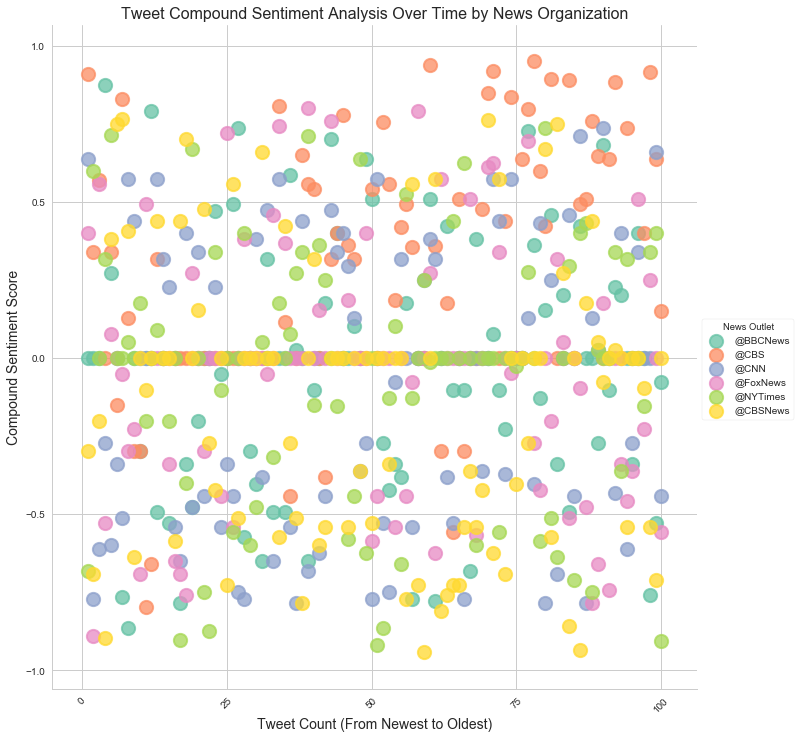

<Figure size 432x288 with 0 Axes>

In [7]:
sns.set()
orgPalette = sns.color_palette("Set2", len(news_outlet))
sns.set_palette(orgPalette)
sns.set_style("whitegrid", {'legend.frameon':True})

# Create the Scatter Plot
compoundSentByTime_plot = sns.lmplot(x="Tweet Count", y="Compound", 
                                data=sentiments_csv, 
                                palette=orgPalette, hue='News Outlet',
                                fit_reg=False, legend=True, size=10, 
                                scatter_kws={'s':175, 'alpha':0.75,
                                             'edgecolors':'face', 
                                             'linewidths':2})

# Establish labels for x-axis and y-axis
plt.xlabel("Tweet Count (From Newest to Oldest)",size=14)
plt.ylabel("Compound Sentiment Score", size=14)

# Create the chart title and tickers
plt.title("Tweet Compound Sentiment Analysis Over Time by News Organization", 
          size=16)
plt.locator_params(nbins=5)
plt.xticks(rotation=45)

#Show the Scatter Plot
plt.show()

# Save the Scatter Plot
plt.savefig("CompoundSentimentAnalysis_Scatterplot.png")

In [8]:
# Find the mean of the compound sentiments by news source
scoresbyoutlet=sentiments_csv.groupby('News Outlet')["Compound"].mean()

# Check 
scoresbyoutlet

News Outlet
@BBCNews   -0.031804
@CBS        0.248885
@CBSNews   -0.127196
@CNN       -0.078016
@FoxNews   -0.033823
@NYTimes   -0.047771
Name: Compound, dtype: float64

In [9]:
x_axis=np.arange(len(scoresbyoutlet))

In [10]:
# Check
scoresbyoutlet

News Outlet
@BBCNews   -0.031804
@CBS        0.248885
@CBSNews   -0.127196
@CNN       -0.078016
@FoxNews   -0.033823
@NYTimes   -0.047771
Name: Compound, dtype: float64

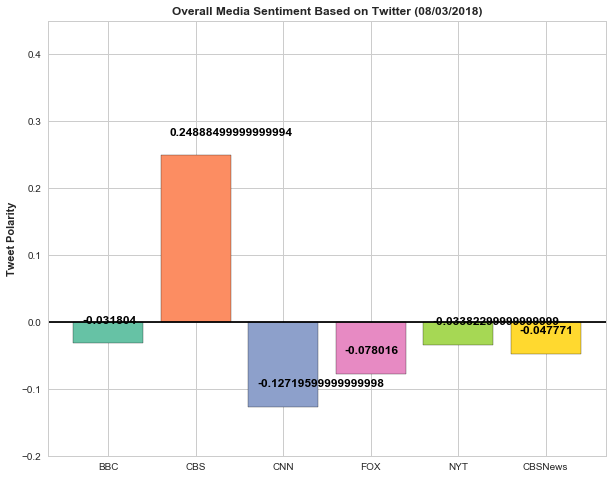

<Figure size 432x288 with 0 Axes>

In [11]:

# pridehawkins --3.21.1970
sns.set()
orgPalette = sns.color_palette("Set2", len(news_outlet))
sns.set_palette(orgPalette)
sns.set_style("whitegrid")

# Set figure size
plt.figure(figsize = (10,8))

# Create bar graph
plt.bar(x_axis,scoresbyoutlet, label = news_outlet, color = orgPalette, edgecolor = "black")

for i, v in enumerate(scoresbyoutlet):
    plt.text(i-.3, v+.03, str(v).format(), color='black', fontweight='bold')

# Creates chart title
plt.title("Overall Media Sentiment Based on Twitter (%s)" % (time.strftime("%m/%d/%Y")),fontweight='bold')

# Establish ylim and labels 
plt.ylim(-.2, .45)
plt.ylabel("Tweet Polarity",fontweight='bold')
x_labels = ["BBC", "CBS", "CNN", "FOX", "NYT", "CBSNews"]

# Creates tickers
x_locations = [value for value in np.arange(6)]#tick locations
plt.xticks(x_locations, x_labels)

# Adds a horizontal line at zero
plt.axhline(y=0, color = 'black') 

#Show the Scatter Plot
plt.show()

# Save the Scatter Plot
plt.savefig('Overall Media Sentiment Based on Twitter.png')

<b><H>Observations:</b><H>
<p>In examining the scatter plot, it seems that all five of the news stations produce neutral tweets; however, it appears the CBSNews, NYTimes, and FoxNews have the most neutral tweets. It should be noted that this is not conclusive based on the scatter plot alone.</p>
<p>Based on the bar chart, CBS is far more positive than any of the other news stations, especially compared to CBSNews, which trends more negative.</p>
<p>Based on the last pull of tweets, CNN is the most negative in sentiment followed by Fox. This seems rather shocking when compared to the other outlets.</p>
<b>Other considerations:</b>
    Ongoing research day by day or another time difference would give us better results in analyzing overall neutral, positive and negative tweets. This would be a better review than a one time capture.